In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_768\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m10_v30_L4_s2=torch.tensor([[[100.0000,  99.9117,  95.7416,  93.2950,  58.8942,  56.5217,  44.0476,
           12.5000,   0.5532,  56.7600],
         [100.0000,  99.5507,  70.4527,  69.2623,  44.2341,  33.7349,  23.3333,
           16.6667,   4.0000,  88.2800],
         [ 99.9848,  98.2072,  89.2228,  77.9874,  42.5806,  31.4815,  14.2857,
            0.0000,   1.7391,  92.7800],
         [ 99.8785,  98.5305,  91.9940,  76.3636,  37.1094,  33.3333,  22.2222,
            0.0000,   7.8838,  94.8900],
         [ 99.9324,  98.3278,  85.6140,  40.6250,  46.6667,  20.0000,  33.3333,
            0.0000,   0.0000,  97.8400],
         [ 99.9255,  97.3054,  86.2434,  90.0000,  32.0000,  16.6667,  50.0000,
            0.0000,   0.0000,  98.9800],
         [ 99.8237,  96.3470,  80.2083,  33.3333,  18.5185,   0.0000,   0.0000,
            0.0000,   0.0000,  99.2000],
         [ 99.8273,  92.6316,  76.3158,  75.0000,  25.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.4800],
         [ 99.9193,  94.7368,  79.1667,   0.0000,  12.5000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.7400],
         [ 99.9197,  91.3043,  76.9231,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.8500]],

        [[100.0000, 100.0000,  92.6523,  73.7892,  49.4919,  35.0664,  26.2997,
           12.1593,   1.5113,  25.3100],
         [ 98.1818,  96.6667,  84.2907,  67.7201,  41.7153,  29.4694,  13.8412,
           12.3077,   4.2012,  47.3600],
         [ 95.4918,  91.3438,  82.6667,  69.7226,  42.8144,  29.6504,  14.6000,
            5.9603,   5.0545,  62.8000],
         [ 98.9767,  93.4793,  78.9444,  60.9756,  38.6364,  19.8347,  11.5226,
            6.9444,   4.7619,  75.4100],
         [ 99.3343,  93.7859,  75.4335,  54.2000,  36.0000,  18.0905,  15.7025,
            6.6667,   1.4851,  84.4200],
         [ 99.2967,  93.3985,  79.5053,  56.5916,  29.4314,  20.2247,   9.4340,
            0.0000,   4.8387,  91.2900],
         [ 99.2437,  92.1260,  72.3282,  48.1707,  26.5306,  20.0000,   0.0000,
            0.0000,   5.5556,  94.3300],
         [ 99.6268,  92.5722,  76.7528,  60.0000,  23.4375,  25.0000,  10.0000,
            0.0000,   0.0000,  97.5000],
         [ 99.7972,  90.5941,  79.0541,  50.0000,  32.2581,  40.0000,   0.0000,
            0.0000,   0.0000,  98.6600],
         [ 99.7823,  87.8327,  74.1936,  60.0000,  27.2727,  60.0000,   0.0000,
            0.0000,   0.0000,  99.1500]],

        [[  0.0000,   0.0000, 100.0000,  70.5882,  61.3636,  57.0248,  35.8885,
           15.8333,   3.3494,   6.0900],
         [  0.0000, 100.0000, 100.0000,  79.7297,  56.9170,  43.2653,  20.2495,
            9.0441,   3.4151,   9.9700],
         [ 83.3333,  86.8421,  61.0294,  48.6068,  36.1280,  21.3052,  13.7217,
            6.9008,   3.9948,  12.4600],
         [ 84.6154,  82.8794,  60.0993,  45.5063,  32.9123,  18.8299,  11.4161,
            5.4118,   4.1684,  21.2000],
         [ 89.0295,  76.7666,  57.7708,  40.7566,  27.0686,  16.1640,  10.1174,
            7.0175,   4.2241,  32.9400],
         [ 95.1883,  83.5191,  64.7446,  45.4869,  28.6828,  16.5158,   9.0237,
            5.1095,   3.6939,  52.1800],
         [ 98.1338,  87.8621,  70.0300,  51.3966,  32.8767,  18.0672,  13.1661,
            7.9755,   4.5455,  71.9400],
         [ 99.3558,  94.0594,  77.6621,  65.5660,  43.7173,  31.6092,  20.7547,
           15.7895,  12.5000,  88.7800],
         [ 99.7592,  96.7293,  86.8852,  72.8261,  55.2941,  54.7945,  36.6667,
           40.0000,  50.0000,  96.2600],
         [ 99.9526,  98.3779,  91.8495,  84.9206,  68.8889,  50.0000,  83.3333,
          100.0000,   0.0000,  99.1300]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  36.0000,
           13.9860,   3.1644,   3.4400],
         [  0.0000,   0.0000,   0.0000,   0.0000,  50.0000,  41.6667,  18.8119,
           10.5882,   3.4822,   4.0400],
         [  0.0000,   0.0000,   0.0000,   0.0000,  37.5000,  19.4444,   7.3569,
            5.1046,   3.1235,   3.6600],
         [  0.0000,   0.0000,  50.0000,  22.7273,  28.2051,  13.7026,  12.1436,
            5.4497,   3.0693,   5.0900],
         [ 50.0000,  52.9412,  41.5730,  27.5862,  19.3141,  11.9705,   7.9214,
            4.5355,   3.0648,   7.1000],
         [ 68.0000,  55.7447,  35.2365,  20.3352,  17.5606,   9.2148,   6.2706,
            4.0719,   3.5156,  12.0600],
         [ 81.6926,  63.5185,  43.6186,  30.0132,  19.5044,  11.5911,   8.3832,
            4.1860,   2.1956,  28.0800],
         [ 98.8620,  95.2764,  89.3871,  78.2079,  64.8485,  54.1344,  41.7021,
           30.3279,  23.7624,  81.0900],
         [ 99.7838,  99.5144,  97.9452,  93.2763,  89.6104,  85.8407,  75.8621,
           69.3878,  28.5714,  97.7300],
         [ 99.9861,  99.8790,  99.7230,  97.5694,  96.5517,  91.6667, 100.0000,
           50.0000,   0.0000,  99.8100]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000,
           13.0435,   3.4687,   3.5100],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  27.2727,
           12.2449,   3.2760,   3.4000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  66.6667,   4.3478,
            6.9401,   3.0932,   3.2400],
         [  0.0000,   0.0000,   0.0000,   0.0000,  33.3333,  41.1765,   7.2848,
            5.4264,   3.3950,   3.7100],
         [  0.0000,   0.0000,   0.0000, 100.0000,  32.4324,  17.9310,   7.7465,
            4.7398,   3.2293,   4.1100],
         [  0.0000,   0.0000,  30.4348,  19.6262,  12.6812,   9.4508,   7.4813,
            4.1801,   3.4303,   5.2500],
         [ 35.7143,  19.4805,  16.1290,  13.0841,  11.7897,   5.8111,   5.6428,
            4.4755,   3.1491,   6.9700],
         [ 96.6252,  91.4833,  83.6762,  71.2454,  59.4937,  50.6164,  39.1421,
           32.8725,  21.1470,  64.1200],
         [ 99.9647,  99.8246,  99.3856,  98.6040,  97.1897,  95.1754,  93.8775,
           91.2281,  84.6154,  98.9900],
         [100.0000,  99.9513,  99.7605,  99.4444, 100.0000, 100.0000, 100.0000,
          100.0000,   0.0000,  99.9500]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   3.4924,   3.4900],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  50.0000,
            8.6957,   3.3089,   3.3400],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  44.4444,
            5.0633,   3.1581,   3.2100],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
            6.7873,   3.3815,   3.4500],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  33.3333,   8.7719,
            4.7198,   3.5317,   3.6600],
         [  0.0000,   0.0000,   0.0000,   0.0000,  25.0000,  11.1111,   7.2973,
            5.3980,   3.6101,   4.1100],
         [  0.0000,   0.0000,   0.0000,   0.0000,   7.2464,   5.3659,   5.1922,
            4.1072,   3.0699,   3.8600],
         [  0.0000,   0.0000,   0.9804,   5.3738,   5.0664,   4.3879,   4.1297,
            3.8479,   3.8369,   4.2300],
         [100.0000,  99.7284,  99.6888,  99.6101,  99.8390,  99.8829,  98.3806,
           96.2963, 100.0000,  99.6800],
         [ 99.9866,  99.9545, 100.0000, 100.0000,   0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,  99.9800]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)



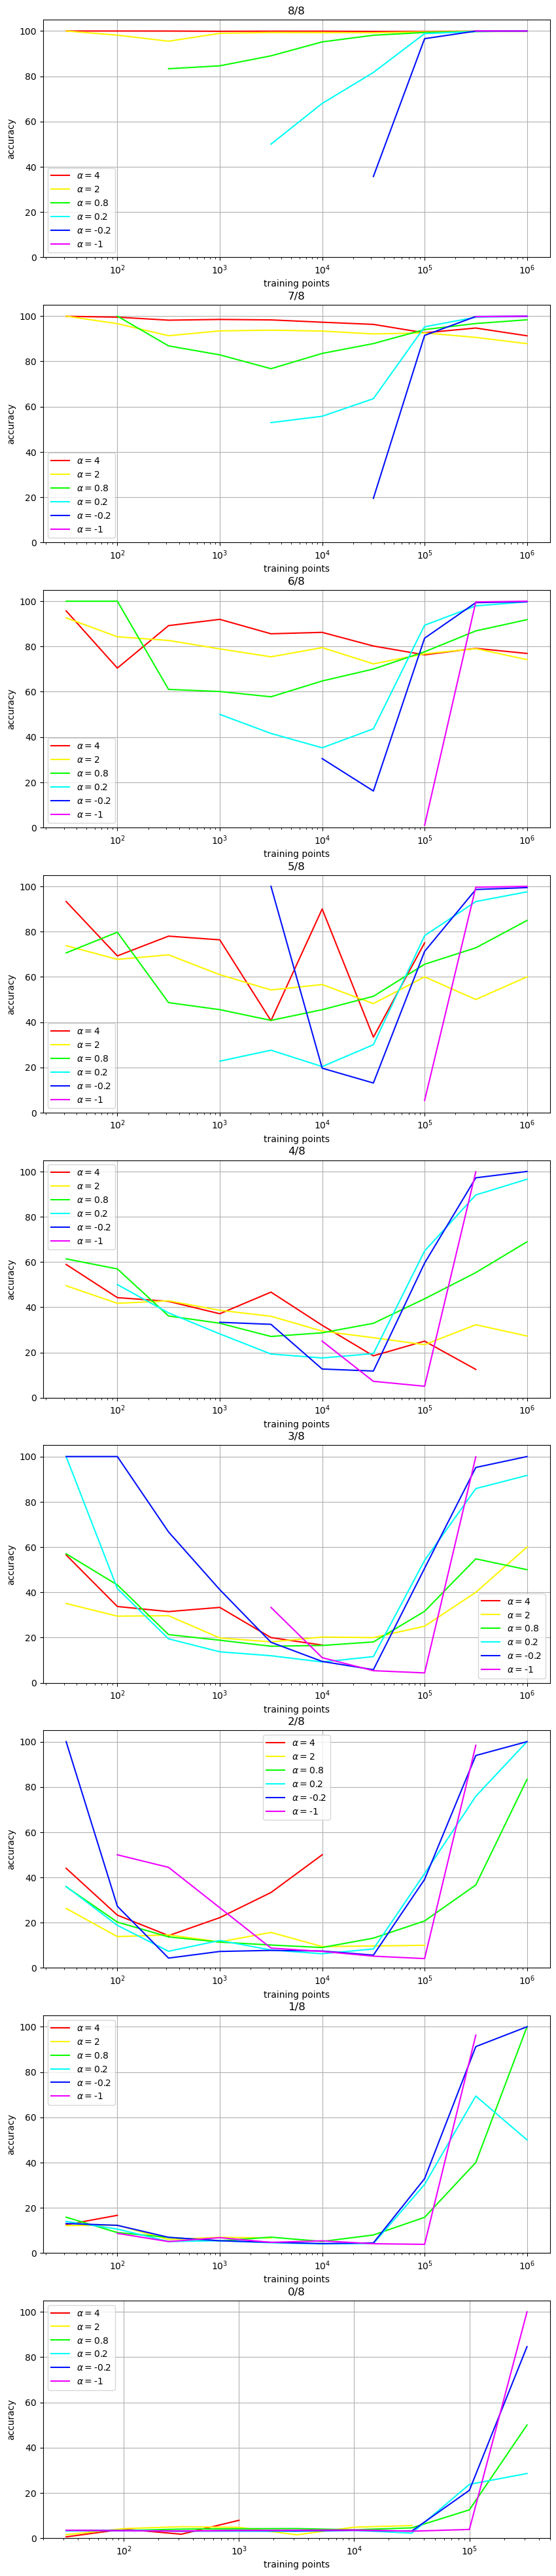

In [3]:
fig, axis = plt.subplots(9, 1, figsize=(10, 50))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["8/8", "7/8", "6/8", "5/8", "4/8", "3/8", "2/8", "1/8", "0/8"]
for i in range(9):  #i is how much path you see
    for j in range(6):  #j is how much temperature you see
        data = m10_v30_L4_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


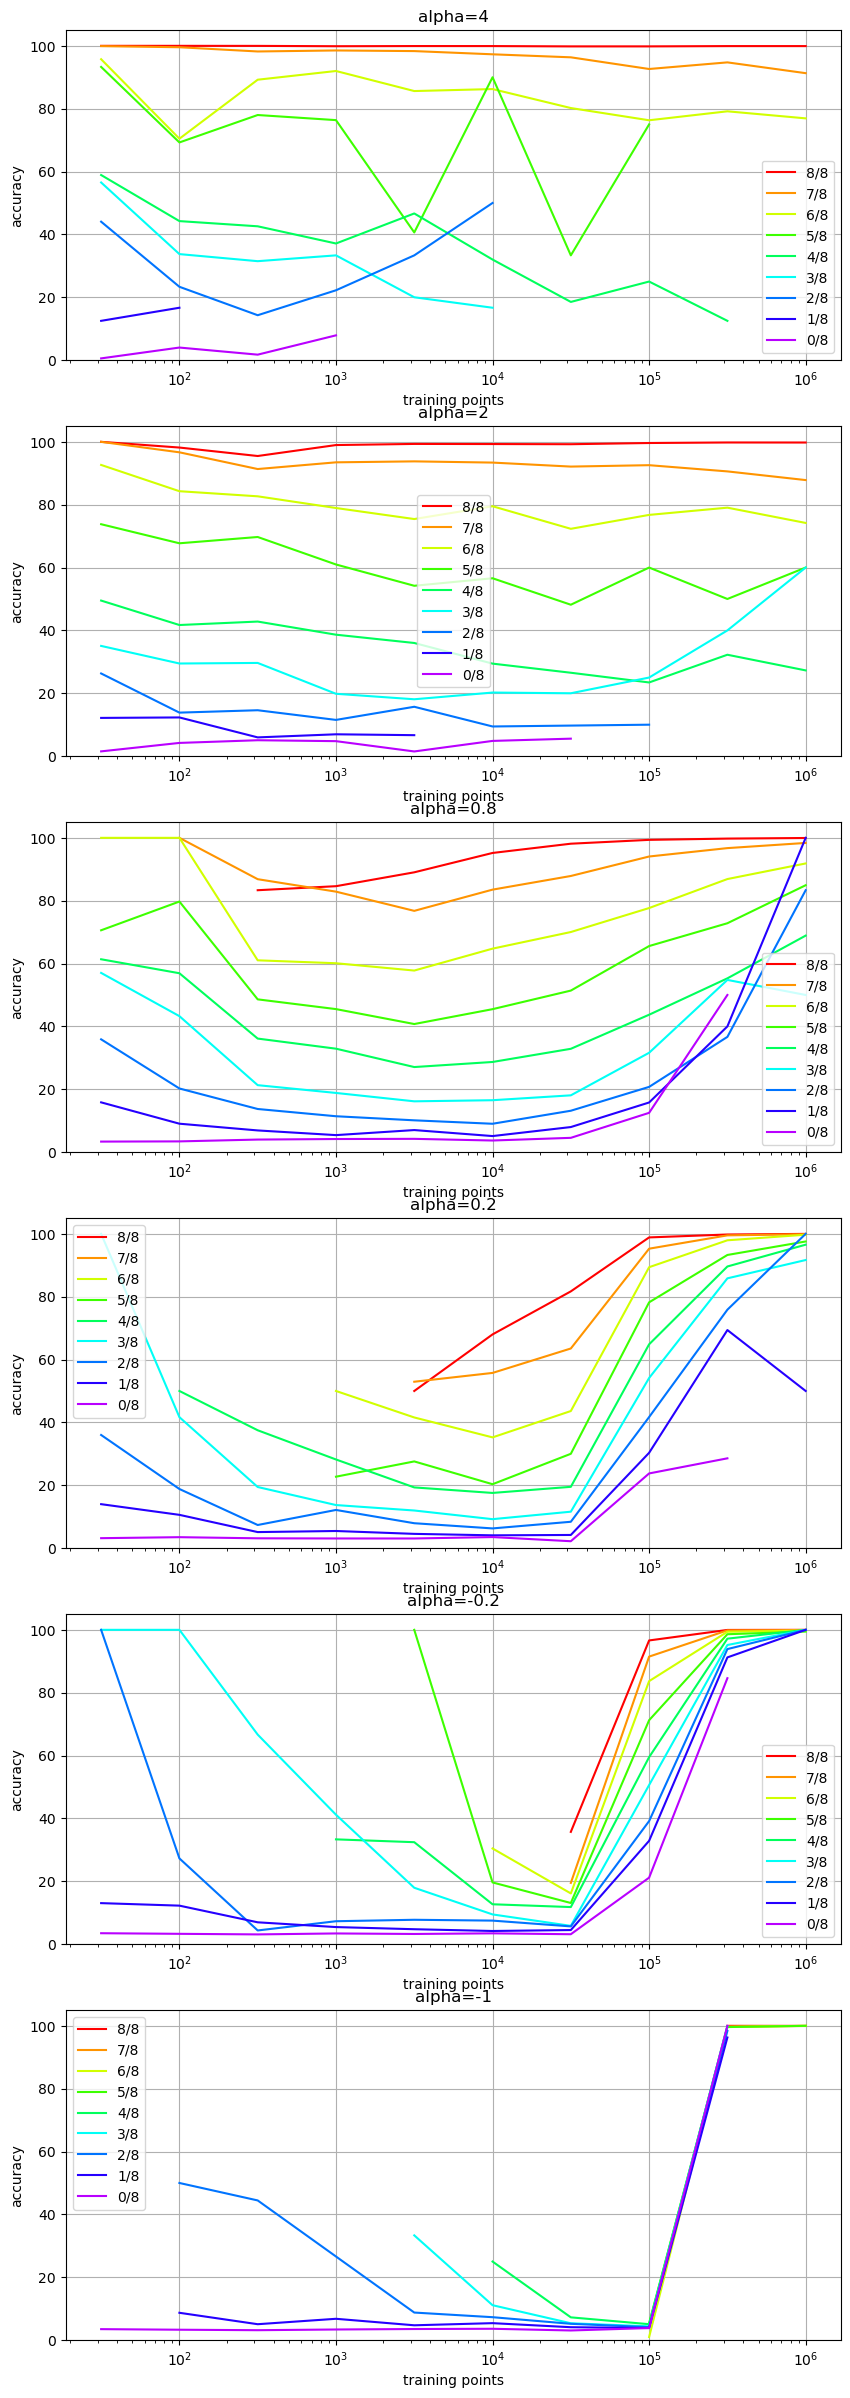

In [4]:
fig, axis = plt.subplots(6, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["8/8", "7/8", "6/8", "5/8", "4/8", "3/8", "2/8", "1/8", "0/8"]
for j in range(6):
    for i in range(9):
        data = m10_v30_L4_s2[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/10), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    